In [54]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [55]:
df=pd.read_csv("hiring.csv")
df.shape

(8, 4)

In [56]:
import math
median_testscore=math.floor(df.test_score.mean())
median_testscore
Noexp='zero'

In [57]:
df.test_score=df.test_score.fillna(median_testscore)
df.experience=df.experience.fillna(Noexp)
df

,experience,test_score,interview_score,salary$
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [58]:
from word2number import w2n


df.experience=df.experience.map(w2n.word_to_num)
df

# for i in range(len(df['experience'])):
#                df['experience'][i]=w2n.word_to_num(df['experience'][i])
# return df

,experience,test_score,interview_score,salary$
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [59]:
y_true=df[['salary$']]
x=df[['experience','test_score','interview_score']]

reg=linear_model.LinearRegression()
reg.fit(x, y_true)
y_true
print(type(y_true))

<class 'pandas.core.frame.DataFrame'>


In [60]:
reg.coef_

array([[2922.26901502, 2221.30909959, 2147.48256637]])

In [61]:

y_pred=reg.predict(x)
y_pred
y_pred_df=pd.DataFrame(y_pred, columns=['Predicted'])
y_pred_df
#merge y_true and y_pred_df together
compare=pd.concat([y_true, y_pred_df], axis=1, sort=False)
compare.columns=['Actual', 'Predicted']
compare

,Actual,Predicted
0,50000,52090.467341
1,45000,45648.019642
2,60000,57964.229084
3,65000,64525.106136
4,70000,68325.211846
5,62000,60783.447853
6,72000,74796.883259
7,80000,79866.634840


Text(0, 0.5, 'Salary($)')

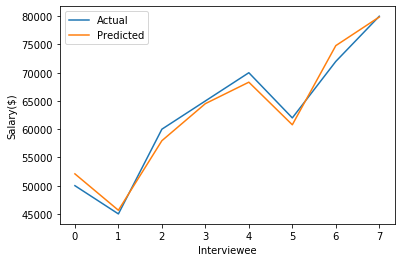

In [62]:
from matplotlib import pyplot as plt

plt.plot(y_true, label='Actual')
plt.plot(y_pred_df, label='Predicted')
plt.legend()
plt.xlabel('Interviewee')
plt.ylabel('Salary($)')

In [65]:
import statsmodels.api as sm

x2=sm.add_constant(x)
ols=sm.OLS(y_true, x2)
ols2=ols.fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                salary$   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     56.67
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000983
Time:                        11:18:23   Log-Likelihood:                -70.528
No. Observations:                   8   AIC:                             149.1
Df Residuals:                       4   BIC:                             149.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.499e+04   7386.210     

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
